In [ ]:
!pip3 install transformers owlready2 docx2txt fasttext python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 31.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.8/242.8 kB 19.2 MB/s eta 0:00:00
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 46.8 MB/s eta 0:00:00
  Created wheel for owlready2: filename=owlready2-0.46-cp310-cp310-linux_x86_64.whl size=24087771 sha256=7faf58873316dfd42d264f8f6c925e87ee169ac3b6fe1785a3496209384eb5ed
  Stored in directory: /root/.cache/pip/wheels/bf/6f/ef/35df148baa59fc6b243aca4f101e17aed14b67dc1166b73fe0
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3960 sha256=be49581f0d3206e3220277467c15e6de047e0331

In [ ]:
!pip install docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docx: filename=docx-0.2.4-py3-none-any.whl size=53895 sha256=bd2f898c4ec135fe2a2b049e41c6aee8700030d649e41f12b540b1d2449592fa
  Stored in directory: /root/.cache/pip/wheels/81/f5/1d/e09ba2c1907a43a4146d1189ae4733ca1a3bfe27ee39507767
Successfully built docx


In [ ]:
!pip install Pypdf2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.5 MB/s eta 0:00:00


# Importing Libraries

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import torch
import docx
from transformers import BertTokenizer, BertModel, AutoModel
from gensim.models.fasttext import FastText
import matplotlib.pyplot as plt
import string
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from owlready2 import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import docx2txt
import fasttext
from transformers import logging
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import cityblock
import hashlib
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
logging.set_verbosity_error()
%matplotlib inline

In [ ]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import warnings

In [ ]:
# Ignore all warnings
warnings.filterwarnings('ignore')

# Pre-processing

In [ ]:
from google.colab import files
import PyPDF2
import io
import spacy
import re

In [ ]:
# User uploads files
uploaded = files.upload()

Saving Input_Text_1.pdf to Input_Text_1.pdf
Saving Talenta_merge.owl to Talenta_merge.owl


In [ ]:
# File names for ontology files
file_names = ['Talenta_merge.owl']

In [ ]:
# Dictionary to store the paths for the ontology files
ontology_paths = {}

In [ ]:
# Write the uploaded file content to new files on the Colab filesystem
for file_name in file_names:
    if file_name in uploaded:
        file_path = f'/content/{file_name}'
        with open(file_path, 'wb') as f:
            f.write(uploaded[file_name])
        ontology_paths[file_name] = file_path
    else:
        print(f"Error: The file {file_name} was not uploaded.")

In [ ]:
# Dictionary to store the loaded ontologies
loaded_ontologies = {}

In [ ]:
# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Load the input pdf file
pdf = open(r'/content/Input_Text_1.pdf', mode='rb')
input_pdf = PyPDF2.PdfReader(pdf)

In [ ]:
# Extract the text from the pdf file
text = ""
for page in input_pdf.pages:
    extracted_text = page.extract_text()
    if extracted_text:  # Check if text extraction returned None
        text += extracted_text + " "  # Append a space to reduce word merging

In [ ]:
# Clean up text by replacing multiple whitespace characters with a single space
text = re.sub(r'\s+', ' ', text)

In [ ]:
# Use the spaCy model to split the text into sentences
doc = nlp(text)
sentences = [sent.text for sent in doc.sents]

In [ ]:
# Filter valid sentences with atleast 2 nouns and a verb
valid_sentences = []
for sent in sentences:
    doc = nlp(sent)
    nouns = [token for token in doc if token.pos_ == "NOUN"]
    verbs = [token for token in doc if token.pos_ == "VERB"]
    if len(nouns) >= 2 and len(verbs) >= 1:
        # Ensure that parentheses are balanced
        if sent.count("(") == sent.count(")"):
            # Filter out sentences with embedded formulas or composed terms that might be parsed incorrectly
            if not re.search(r"\b\w+\([\w\s]+\)|\([\w\s]+\)\w+\b", sent):
                valid_sentences.append(sent)

In [ ]:
valid_sentences

['Approved Sector Plan and Sectional Map Amendment for the Tuxedo Road/Arbor Street/Cheverly Metro Area 31 Infrastructure Elements 32 Approved Sector Plan and Sectional Map Amendment for the Tuxedo Road/Arbor Street/Cheverly Metro Area Approved Sector Plan and Sectional Map Amendment for the Tuxedo Road/Arbor Street/Cheverly Metro Area 33Goals • To provide an efficient multimodal transportation system that reduces dependency on the automobile.',
 '• To provide safe and convenient vehicular and nonvehicular circulation and access by separating commercial and noncommercial traffic and providing direct pedestrian connections to the Metro station and the residential, commercial, and industrial areas.',
 '• To develop a system of trails, sidewalks, and bikeways that connect to the surrounding regional trail systems and the Anacostia Heritage Trail.',
 'The 2001 average annual daily traffic (AADT) volumes along major highways serving the area are shown in Table 2 of the Sector Area Profile c

In [ ]:
# Define a translation table to remove punctuations, symbols, and hyphens
translator = str.maketrans("", "", string.punctuation + "’‘“”")

In [ ]:
# Remove punctuations, symbols, and hyphens from each element of the list
valid_sentences = [s.translate(translator).strip() for s in valid_sentences]

In [ ]:
#Removing numbers if any
valid_sentences = [re.sub(r'\d+', '', x).strip() for x in valid_sentences]

In [ ]:
#Removing unnecessary punctuations from the text
valid_sentences = [n.replace('\n', '') for n in valid_sentences]
valid_sentences = [n.replace('\t', '') for n in valid_sentences]
valid_sentences = [n.replace('–', '') for n in valid_sentences]

In [ ]:
valid_sentences

['Approved Sector Plan and Sectional Map Amendment for the Tuxedo RoadArbor StreetCheverly Metro Area  Infrastructure Elements  Approved Sector Plan and Sectional Map Amendment for the Tuxedo RoadArbor StreetCheverly Metro Area Approved Sector Plan and Sectional Map Amendment for the Tuxedo RoadArbor StreetCheverly Metro Area Goals • To provide an efficient multimodal transportation system that reduces dependency on the automobile',
 '• To provide safe and convenient vehicular and nonvehicular circulation and access by separating commercial and noncommercial traffic and providing direct pedestrian connections to the Metro station and the residential commercial and industrial areas',
 '• To develop a system of trails sidewalks and bikeways that connect to the surrounding regional trail systems and the Anacostia Heritage Trail',
 'The  average annual daily traffic AADT volumes along major highways serving the area are shown in Table  of the Sector Area Profile chapter',
 'The Washington 

In [ ]:
len(valid_sentences)

175

# Ontologies

In [ ]:
from owlready2 import get_ontology

In [ ]:
# Load the ontologies using the file paths or URLs
merger = get_ontology('/content/Talenta_merge.owl').load()

## Talenta_merge

In [ ]:
# Get the list of classes with annotations
merger_class = []

In [ ]:
for cls in merger.classes():
    annotations = cls.comment
    if annotations:
        merger_class.append(cls.name)

In [ ]:
merger_class

['Agency',
 'Route',
 'Trip',
 'TemporalEntity',
 'System_of_units',
 'Length',
 'Stop',
 'DropOffType',
 'Station',
 'FareClass',
 'PaymentMethod',
 'PickupType',
 'FareRule',
 'RouteType',
 'Service',
 'ServiceRule',
 'Shape',
 'ShapePoint',
 'TransferType',
 'TransfersAllowedType',
 'WheelchairBoardingStatus',
 'Zone',
 'GeneralDateTimeDescription',
 'DayOfWeek',
 'Instant',
 'DateTimeInterval',
 'Duration',
 'GeneralDurationDescription',
 'TemporalPosition',
 'TRS',
 'TemporalDuration',
 'TimePosition',
 'Interval',
 'ProperInterval',
 'MonthOfYear',
 'TimeZone',
 'TemporalUnit',
 'Actuation',
 'ActuatableProperty',
 'Observation',
 'Sampling',
 'FeatureOfInterest',
 'Sample',
 'Result',
 'Platform',
 'Actuator',
 'Sampler',
 'Sensor',
 'ObservableProperty',
 'Procedure',
 'StopTime',
 'CalendarDateRule',
 'Frequency',
 'TransferRule',
 'Cardinality_unit',
 'Population',
 'DateTimeDescription',
 'Population_measure',
 'Population_size',
 'ChangeOntologyThing',
 'Area',
 'Geo_Positi

In [ ]:
merger.classes()
merger_cls = list(merger.classes())

In [ ]:
merger.properties()
merger_property = list(merger.properties())

In [ ]:
merger_annotations = []
for ann in merger_cls:
    print(f"\t{ann}: {ann.comment}")
    merger_annotations.append(str(ann.comment))

	0.1.Agent_SSN: []
	terms.Agency: [locstr('An agency operates a certain schedule based transport mode', 'en'), locstr('Una empresa opera un cierto modo de transporte de manera programada', 'es')]
	terms.Route: [locstr('A gtfs:Route is a commercial route followed entirely or partly by gtfs:Trips', 'en'), locstr('Una gtfs:Route es un grupo de viajes (gtfs:Trips) que se muestran a los usuarios como servicio independiente', 'es')]
	terms.Trip: [locstr('A collection of gtfs:StopTimes followed by a transit vehicle', 'en'), locstr('Trayecto de dos o mÃ¡s paradas realizadas por un vehÃ\xadculo que se produce a una gtfs:StopTime', 'es')]
	time.TemporalEntity: [locstr('A temporal interval or instant.', 'en'), locstr('Un intervalo temporal o un instante.', 'es'), locstr('A temporal interval or instant.', 'en')]
	OM.Quantity: []
	OM.Function: []
	OM.System_of_units: ['In order to achieve a coherent, interdependent set of units of measure in the wide variety of units that exist, units are organised

In [ ]:
# Remove the full stop from each element
merger_annotations = [x.replace('.', '') for x in merger_annotations]

In [ ]:
for i in range(len(merger_annotations)):
    merger_annotations[i] = merger_annotations[i] + "."

In [ ]:
merger_annotations

['[].',
 "[locstr('An agency operates a certain schedule based transport mode', 'en'), locstr('Una empresa opera un cierto modo de transporte de manera programada', 'es')].",
 "[locstr('A gtfs:Route is a commercial route followed entirely or partly by gtfs:Trips', 'en'), locstr('Una gtfs:Route es un grupo de viajes (gtfs:Trips) que se muestran a los usuarios como servicio independiente', 'es')].",
 "[locstr('A collection of gtfs:StopTimes followed by a transit vehicle', 'en'), locstr('Trayecto de dos o mÃ¡s paradas realizadas por un vehÃ\\xadculo que se produce a una gtfs:StopTime', 'es')].",
 "[locstr('A temporal interval or instant', 'en'), locstr('Un intervalo temporal o un instante', 'es'), locstr('A temporal interval or instant', 'en')].",
 '[].',
 '[].',
 "['In order to achieve a coherent, interdependent set of units of measure in the wide variety of units that exist, units are organised in systems of units A system of units is based on a set of units chosen by convention to be t

In [ ]:
merger_ann = ', '.join(merger_annotations)

In [ ]:
# define a regular expression to match non-word characters except full stops
regex = re.compile('[%s]' % re.escape(string.punctuation.replace('.', '')))

In [ ]:
# apply the regular expression to remove non-word characters
merger_ann = regex.sub('', merger_ann)
merger_ann = re.sub(r'\b(?<!\w)en\b(?!\w)', '', merger_ann)

In [ ]:
merger_ann

'. locstrAn agency operates a certain schedule based transport mode  locstrUna empresa opera un cierto modo de transporte de manera programada es. locstrA gtfsRoute is a commercial route followed entirely or partly by gtfsTrips  locstrUna gtfsRoute es un grupo de viajes gtfsTrips que se muestran a los usuarios como servicio independiente es. locstrA collection of gtfsStopTimes followed by a transit vehicle  locstrTrayecto de dos o mÃ¡s paradas realizadas por un vehÃxadculo que se produce a una gtfsStopTime es. locstrA temporal interval or instant  locstrUn intervalo temporal o un instante es locstrA temporal interval or instant . . . In order to achieve a coherent interdependent set of units of measure in the wide variety of units that exist units are organised in systems of units A system of units is based on a set of units chosen by convention to be the system’s base units units that are considered to be mutually independent ie can’t be expressed in terms of each other. . . Length is

In [ ]:
sentences_merger = merger_ann.split('. ')
valid_sentences_merger = [s.strip() for s in sentences_merger]

In [ ]:
# Define a translation table to remove punctuations, symbols, and hyphens
translator_merger = str.maketrans("", "", string.punctuation + "’‘“”")

In [ ]:
# Remove punctuations, symbols, and hyphens from each element of the list
valid_sentences_merger = [s.translate(translator_merger).strip() for s in valid_sentences_merger]

In [ ]:
#Removing unnecessary punctuations from the text
valid_sentences_merger = [n.replace('\n', '') for n in valid_sentences_merger]
valid_sentences_merger = [n.replace('locstr', '') for n in valid_sentences_merger]
valid_sentences_merger = [n.replace('-', '') for n in valid_sentences_merger]

In [ ]:
valid_sentences_merger = [item for item in valid_sentences_merger if item != ' ' and item != '']

In [ ]:
valid_sentences_merger

['An agency operates a certain schedule based transport mode  Una empresa opera un cierto modo de transporte de manera programada es',
 'A gtfsRoute is a commercial route followed entirely or partly by gtfsTrips  Una gtfsRoute es un grupo de viajes gtfsTrips que se muestran a los usuarios como servicio independiente es',
 'A collection of gtfsStopTimes followed by a transit vehicle  Trayecto de dos o mÃ¡s paradas realizadas por un vehÃxadculo que se produce a una gtfsStopTime es',
 'A temporal interval or instant  Un intervalo temporal o un instante es A temporal interval or instant',
 'In order to achieve a coherent interdependent set of units of measure in the wide variety of units that exist units are organised in systems of units A system of units is based on a set of units chosen by convention to be the systems base units units that are considered to be mutually independent ie cant be expressed in terms of each other',
 'Length is the amount of space between two geographical point

In [ ]:
# Chexking for duplicates
unique_items = set(valid_sentences_merger)
duplicates = [item for item in unique_items if valid_sentences_merger.count(item) > 1]
duplicates

[]

In [ ]:
len(valid_sentences_merger)

87

### Bert Model

In [ ]:
# Load pre-trained model and tokenizer
model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# define the get_embedding function
def get_embedding(text, model, tokenizer):
    input_ids = tokenizer.encode(text, add_special_tokens=True)
    input_ids = torch.tensor(input_ids).unsqueeze(0)
    with torch.no_grad():
        outputs = model(input_ids)
        last_hidden_states = outputs[0].squeeze(0)
        mean_last_hidden_states = torch.mean(last_hidden_states, dim=0)
    return mean_last_hidden_states.numpy()

In [ ]:
# Create empty lists for embeddings
bert_embeddings = []
bert_embeddings_merger = []

In [ ]:
# Loop over sentences and calculate embeddings
for sent1 in valid_sentences:
    embedding1 = get_embedding(sent1, model, tokenizer)
    bert_embeddings.append(embedding1)
    for sent2 in valid_sentences_merger:
        embedding2 = get_embedding(sent2, model, tokenizer)
        bert_embeddings_merger.append(embedding2)

In [ ]:
# Create dataframe
data_merger = {
    "Input_Sentence": [],
    "Annotation": [],
    "Input_Sentence_Embedding": [],
    "Annotation_Embedding": [],
}

In [ ]:
for sent1, emb1 in zip(valid_sentences, bert_embeddings):
    for sent2, emb2 in zip(valid_sentences_merger, bert_embeddings_merger):
        data_merger["Input_Sentence"].append(sent1)
        data_merger["Annotation"].append(sent2)
        data_merger["Input_Sentence_Embedding"].append(emb1)
        data_merger["Annotation_Embedding"].append(emb2)

In [ ]:
df_merger = pd.DataFrame(data_merger)

In [ ]:
df_merger.head(10)

,Input_Sentence,Annotation,Input_Sentence_Embedding,Annotation_Embedding
0,Approved Sector Plan and Sectional Map Amendme...,An agency operates a certain schedule based tr...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.035045516, -0.07233052, 0.16500607, 0.3149..."
1,Approved Sector Plan and Sectional Map Amendme...,A gtfsRoute is a commercial route followed ent...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.054234196, -0.00381792, 0.1817012, 0.32130..."
2,Approved Sector Plan and Sectional Map Amendme...,A collection of gtfsStopTimes followed by a tr...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.08012555, -0.06147611, 0.23603426, 0.37853..."
3,Approved Sector Plan and Sectional Map Amendme...,A temporal interval or instant Un intervalo t...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.35903305, -0.15920939, 0.18648812, 0.04017..."
4,Approved Sector Plan and Sectional Map Amendme...,In order to achieve a coherent interdependent ...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[0.00014429944, 0.46364126, 0.3825792, -0.0313..."
5,Approved Sector Plan and Sectional Map Amendme...,Length is the amount of space between two geog...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.07684398, 0.017499827, 0.30890438, -0.0489..."
6,Approved Sector Plan and Sectional Map Amendme...,A location where passengers board or disembark...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.065176375, -0.17420074, 0.06748516, 0.2930..."
7,Approved Sector Plan and Sectional Map Amendme...,Instances of this class can be used by gtfsdro...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.39102066, 0.04357686, 0.059944436, 0.22893..."
8,Approved Sector Plan and Sectional Map Amendme...,A physical structure or area that contains one...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.000887601, 0.08129435, 0.30573845, 0.12018..."
9,Approved Sector Plan and Sectional Map Amendme...,A class describing how the fare is calculated ...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.124511525, -0.16616483, 0.3174032, 0.20134..."


In [ ]:
# Adding class to the dataframe
rep_class = []
for i in range(len(valid_sentences)):
    rep_class += merger_class

In [ ]:
df_merger['Class'] = rep_class[:len(df_merger)]

In [ ]:
# Define a lambda function to calculate the cosine similarity between embeddings
cosine_sim = lambda x: cosine_similarity([x['Input_Sentence_Embedding']], [x['Annotation_Embedding']])[0][0]

In [ ]:
# Apply the lambda function to create a new column of cosine similarities
df_merger['Cosine_Similarity'] = df_merger.apply(cosine_sim, axis=1)

In [ ]:
df_merger.head(10)

,Input_Sentence,Annotation,Input_Sentence_Embedding,Annotation_Embedding,Class,Cosine_Similarity
0,Approved Sector Plan and Sectional Map Amendme...,An agency operates a certain schedule based tr...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.035045516, -0.07233052, 0.16500607, 0.3149...",Agency,0.614585
1,Approved Sector Plan and Sectional Map Amendme...,A gtfsRoute is a commercial route followed ent...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.054234196, -0.00381792, 0.1817012, 0.32130...",Route,0.653979
2,Approved Sector Plan and Sectional Map Amendme...,A collection of gtfsStopTimes followed by a tr...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.08012555, -0.06147611, 0.23603426, 0.37853...",Trip,0.631263
3,Approved Sector Plan and Sectional Map Amendme...,A temporal interval or instant Un intervalo t...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.35903305, -0.15920939, 0.18648812, 0.04017...",TemporalEntity,0.543204
4,Approved Sector Plan and Sectional Map Amendme...,In order to achieve a coherent interdependent ...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[0.00014429944, 0.46364126, 0.3825792, -0.0313...",System_of_units,0.651000
5,Approved Sector Plan and Sectional Map Amendme...,Length is the amount of space between two geog...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.07684398, 0.017499827, 0.30890438, -0.0489...",Length,0.682758
6,Approved Sector Plan and Sectional Map Amendme...,A location where passengers board or disembark...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.065176375, -0.17420074, 0.06748516, 0.2930...",Stop,0.629935
7,Approved Sector Plan and Sectional Map Amendme...,Instances of this class can be used by gtfsdro...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.39102066, 0.04357686, 0.059944436, 0.22893...",DropOffType,0.602401
8,Approved Sector Plan and Sectional Map Amendme...,A physical structure or area that contains one...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.000887601, 0.08129435, 0.30573845, 0.12018...",Station,0.609685
9,Approved Sector Plan and Sectional Map Amendme...,A class describing how the fare is calculated ...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.124511525, -0.16616483, 0.3174032, 0.20134...",FareClass,0.584142


In [ ]:
# group the dataframe by the sentences in the original paragraph and find the maximum cosine similarity score for each group
max_similarities_merger = df_merger.groupby('Input_Sentence')['Cosine_Similarity'].max().reset_index()

In [ ]:
# merge the original dataframe with the maximum cosine similarity scores
df_cosine_similarity_merger = pd.merge(df_merger, max_similarities_merger, on=['Input_Sentence', 'Cosine_Similarity'], how='inner')

In [ ]:
# Remove duplicates based on column 'Cosine_Similarity'
df_cosine_similarity_merger.drop_duplicates(subset=['Cosine_Similarity'], keep='first', inplace=True)

In [ ]:
# Reset the index of the resulting dataframe
df_cosine_similarity_merger.reset_index(drop=True, inplace=True)

In [ ]:
df_cosine_similarity_merger.head(10)

,Input_Sentence,Annotation,Input_Sentence_Embedding,Annotation_Embedding,Class,Cosine_Similarity
0,Approved Sector Plan and Sectional Map Amendme...,Descripción de fecha y tiempo estructurada con...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939...","[-0.3688892, 0.26833338, 0.26495752, 0.0948137...",DateTimeDescription,0.775843
1,• To provide safe and convenient vehicular and...,An urban administrative division with jurisdic...,"[-0.0318279, -0.11287132, 0.32198036, 0.054738...","[-0.28606695, 0.12172367, 0.3592403, 0.0892327...",Municipality,0.702366
2,• To develop a system of trails sidewalks and ...,An urban administrative division with jurisdic...,"[-0.2713781, 0.007005232, 0.21209206, 0.235203...","[-0.28606695, 0.12172367, 0.3592403, 0.0892327...",Municipality,0.696516
3,The average annual daily traffic AADT volumes...,The Travel Time Index TTI calculated against t...,"[-0.35839623, 0.110800855, 0.30453494, -0.0585...","[-0.1328742, -0.16982989, 0.3609558, 0.1292343...",TTI_Max,0.683808
4,The Washington Metropolitan Area Transit Autho...,An urban administrative division with jurisdic...,"[-0.0844689, -0.1214527, -0.06310612, 0.195376...","[-0.28606695, 0.12172367, 0.3592403, 0.0892327...",Municipality,0.602287
5,The WMATA Metro bus routes that serve the area...,Future extensions should capture this semantic...,"[-0.03361992, -0.15805896, 0.34685785, 0.16275...","[-0.083361626, 0.19088, 0.34478, 0.009618882, ...",AccessRestriction,0.680714
6,Although Maryland Railroad Commuter System MAR...,Future extensions should capture this semantic...,"[-0.28095657, -0.34353176, 0.011578255, 0.1449...","[-0.083361626, 0.19088, 0.34478, 0.009618882, ...",AccessRestriction,0.673231
7,Overall road condition and road width in the i...,Capacity of traffic throughput for a lane eg v...,"[-0.009399944, 0.05538921, 0.27780548, 0.02605...","[-0.054446496, -0.24874516, 0.40807396, 0.0498...",LaneCapacity_unit,0.761891
8,The predominance of large visible outdoor stor...,An urban administrative division with jurisdic...,"[-0.042771887, 0.18431464, 0.22870432, -0.1164...","[-0.28606695, 0.12172367, 0.3592403, 0.0892327...",Municipality,0.738449
9,Pedestrian access to the Metro station from th...,Future extensions should capture this semantic...,"[-0.11237871, -0.13679272, -0.088066325, -0.01...","[-0.083361626, 0.19088, 0.34478, 0.009618882, ...",AccessRestriction,0.633655


In [ ]:
# Create a new dataframe for hash codes
df_cosine_similarity_hc_merger = df_cosine_similarity_merger.copy()

In [ ]:
# Removing the Embedding columns
del df_cosine_similarity_hc_merger['Input_Sentence_Embedding']
del df_cosine_similarity_hc_merger['Annotation_Embedding']

In [ ]:
# create a new column with the hash code of the Input Sentence column
df_cosine_similarity_hc_merger['Hash_Code'] = df_cosine_similarity_hc_merger['Input_Sentence'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

In [ ]:
df_cosine_similarity_hc_merger.head(3)

,Input_Sentence,Annotation,Class,Cosine_Similarity,Hash_Code
0,Approved Sector Plan and Sectional Map Amendme...,Descripción de fecha y tiempo estructurada con...,DateTimeDescription,0.775843,cc15873ab67be8a2d98de7c0413974e714bd7a60c9d6aa...
1,• To provide safe and convenient vehicular and...,An urban administrative division with jurisdic...,Municipality,0.702366,659ee9ee495c33813033acd45f1fe6748cd301dba6e96d...
2,• To develop a system of trails sidewalks and ...,An urban administrative division with jurisdic...,Municipality,0.696516,7c836479d9c62a0247d968833ad60a96e345259dcdd806...


### Populating the Hash-Code within the ontology

In [ ]:
# Iterate through each row of the dataframe
for index, col in df_cosine_similarity_hc_merger.iterrows():
    # Get the hash code and the class from the current row
    hash_code = col['Hash_Code']
    class_name = col['Class']
    # Iterate through the classes in the ontology
    for cls in class_name:
        # Get the namespace of the ontology
        ns = merger.get_namespace(base_iri=merger.base_iri)
        # Get the class from the namespace
        cls = getattr(ns, class_name, None)
        # Check if the class was found in the ontology
        if cls is not None and isinstance(cls, ThingClass):
            # Create a new instance of the class with the hash code as the name
            instance = cls(hash_code)
        else:
            print(f"Class {class_name} not found in ontology")
        break  # exit the inner loop since we've found the matching class

Class DateTimeDescription not found in ontology
Class Municipality not found in ontology
Class Municipality not found in ontology
Class TTI_Max not found in ontology
Class Municipality not found in ontology
Class AccessRestriction not found in ontology
Class AccessRestriction not found in ontology
Class LaneCapacity_unit not found in ontology
Class Municipality not found in ontology
Class AccessRestriction not found in ontology
Class Municipality not found in ontology
Class Municipality not found in ontology
Class Municipality not found in ontology
Class Municipality not found in ontology
Class Input not found in ontology
Class Municipality not found in ontology
Class Municipality not found in ontology
Class EAID_DDD1E395_EBF7_473f_91B8_5544895D41D0 not found in ontology
Class AccessRestriction not found in ontology
Class AccessRestriction not found in ontology
Class Sample not found in ontology
Class Municipality not found in ontology
Class Municipality not found in ontology
Class Lan

In [ ]:
# Save the ontology
merger.save("Talenta_merge.owl")

In [ ]:
for i in merger.Entity.instances(): print(i)

AttributeError: 'NoneType' object has no attribute 'instances'

In [ ]:
# Print the individuals
for individual in merger.individuals():
    print(individual)

ns.sosa
ns.ssn
TransportationSystem.vehicle_presence
TransportationSystem.mean_travel_speed
TransportationSystem.road_occupancy
TransportationSystem.vehicle_volume
OM.average
OM.NAD83
OM.WGS84
TransportationSystem.vehicles_per_hour
TransportationSystem.vehicles_per_hour_per_lane
vocab.gtfs.org.terms
terms.BeforeBoarding
terms.Bus
terms.CableCar
terms.CheckParentStation
terms.EnsuredTransfer
terms.Ferry
terms.Funicular
terms.Gondola
terms.LightRail
terms.MinimumTimeTransfer
terms.MustCoordinateWithDriver
terms.MustPhone
terms.NoTransfer
terms.NoTransfersAllowed
terms.NotAvailable
terms.NotWheelchairAccessible
terms.OnBoard
terms.OneTransfersAllowed
terms.Rail
terms.RecommendedTransfer
terms.Regular
terms.Subway
terms.TwoTransfersAllowed
terms.UnlimitedTransfersAllowed
terms.WheelchairAccessible
Talenta_merge.765efcb9aa7ea78e80c7f8009fd34d948321154e7d73d68cd987fb312bc0fd73
Talenta_merge.4ffb864029cada65a244da6fb10207ea303b191c5fb815c3fbf56c22c3f884a7


In [ ]:
# Get a generator object for all individuals in the ontology
individuals = merger.individuals()

In [ ]:
# Loop over the generator and print the URI of each individual
for individual in individuals:
    individual_uri = individual.iri
    print("Individual URI:", individual_uri)

Individual URI: http://www.w3.org/ns/sosa
Individual URI: http://www.w3.org/ns/ssn
Individual URI: http://ontology.eil.utoronto.ca/icity/TransportationSystem/vehicle_presence
Individual URI: http://ontology.eil.utoronto.ca/icity/TransportationSystem/mean_travel_speed
Individual URI: http://ontology.eil.utoronto.ca/icity/TransportationSystem/road_occupancy
Individual URI: http://ontology.eil.utoronto.ca/icity/TransportationSystem/vehicle_volume
Individual URI: http://ontology.eil.utoronto.ca/icity/OM/average
Individual URI: http://ontology.eil.utoronto.ca/icity/OM/NAD83
Individual URI: http://ontology.eil.utoronto.ca/icity/OM/WGS84
Individual URI: http://ontology.eil.utoronto.ca/icity/TransportationSystem/vehicles_per_hour
Individual URI: http://ontology.eil.utoronto.ca/icity/TransportationSystem/vehicles_per_hour_per_lane
Individual URI: http://vocab.gtfs.org/terms
Individual URI: http://vocab.gtfs.org/terms#BeforeBoarding
Individual URI: http://vocab.gtfs.org/terms#Bus
Individual URI:

In [ ]:
# Iterate over all individuals in the ontology
for individual in merger.individuals():
    print("Individual:", individual.iri)
    # Get the list of classes that the individual is a direct instance of
    classes = individual.is_a
    # Print the classes
    for cls in classes:
        print("Class:", cls.iri)

Individual: http://www.w3.org/ns/sosa
Class: http://purl.org/vocommons/voaf#Vocabulary
Individual: http://www.w3.org/ns/ssn
Class: http://purl.org/vocommons/voaf#Vocabulary
Individual: http://ontology.eil.utoronto.ca/icity/TransportationSystem/vehicle_presence
Class: http://www.w3.org/ns/ssn/Stimulus
Individual: http://ontology.eil.utoronto.ca/icity/TransportationSystem/mean_travel_speed
Class: http://www.w3.org/ns/sosa/ObservableProperty
Individual: http://ontology.eil.utoronto.ca/icity/TransportationSystem/road_occupancy
Class: http://www.w3.org/ns/sosa/ObservableProperty
Individual: http://ontology.eil.utoronto.ca/icity/TransportationSystem/vehicle_volume
Class: http://www.w3.org/ns/sosa/ObservableProperty
Individual: http://ontology.eil.utoronto.ca/icity/OM/average
Class: http://ontology.eil.utoronto.ca/icity/OM/Function
Individual: http://ontology.eil.utoronto.ca/icity/OM/NAD83
Class: http://ontology.eil.utoronto.ca/icity/OM/Geo_Position_unit
Individual: http://ontology.eil.utoron

### Fast-Text

In [ ]:
# Convert the sentences to lowercase
lowercase_sentences = [sentence.lower() for sentence in valid_sentences]
lowercase_sentences_merger = [sentence.lower() for sentence in valid_sentences_merger]

In [ ]:
# create a dictionary to map the original sentences with the converted lowercase sentences for further use
dict_merger = {}
dict_ann_merger = {}

In [ ]:
# loop over the lists and add the elements as key-value pairs in the dictionary
for i in range(len(lowercase_sentences)):
    dict_merger[lowercase_sentences[i]] = valid_sentences[i]

In [ ]:
for i in range(len(lowercase_sentences_merger)):
    dict_ann_merger[lowercase_sentences_merger[i]] = valid_sentences_merger[i]

In [ ]:
# Split the sentences into words
lowercase_words = []
for sentence in lowercase_sentences:
    lowercase_words.extend(sentence.split())

In [ ]:
lowercase_words_merger = []
for sentence in lowercase_sentences_merger:
    lowercase_words_merger.extend(sentence.split())

In [ ]:
# Write the input sentences to a text file
with open('ft_sentences_merger.txt', 'w') as f:
    for s1 in lowercase_words:
        f.write(s1 + '\n')

In [ ]:
# Write the annotations to a text file
with open('ft_sentences_ann_merger.txt', 'w') as f:
    for s2 in lowercase_words_merger:
        f.write(s2 + '\n')

In [ ]:
# Create dataframe with every combination of sentences
combos = list(itertools.product(lowercase_sentences, lowercase_sentences_merger))
df_merger_ft = pd.DataFrame(combos, columns=["Input_Sentence", "Annotation"])

In [ ]:
# Train the FastText model
ft_model_merger = fasttext.train_unsupervised('ft_sentences_merger.txt', model='skipgram', dim=100)
ft_model_ann_merger = fasttext.train_unsupervised('ft_sentences_ann_merger.txt', model='skipgram', dim=100)

In [ ]:
# Function to create embeddings for the sentences
def create_embedding_merger(sentence):
    return ft_model_merger.get_sentence_vector(sentence)

In [ ]:
def create_embedding_ann_merger(sentence):
    return ft_model_ann_merger.get_sentence_vector(sentence)

In [ ]:
# Apply function to each row of the DataFrame
df_merger_ft['Input_Sentence_Embedding'] = df_merger_ft['Input_Sentence'].apply(create_embedding_merger)
df_merger_ft['Annotation_Embedding'] = df_merger_ft['Annotation'].apply(create_embedding_ann_merger)

In [ ]:
df_merger_ft.head(10)

,Input_Sentence,Annotation,Input_Sentence_Embedding,Annotation_Embedding
0,approved sector plan and sectional map amendme...,an agency operates a certain schedule based tr...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.011718241, 0.014765915, 0.0020094083, 0.047..."
1,approved sector plan and sectional map amendme...,a gtfsroute is a commercial route followed ent...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.038202625, 0.007976694, 0.0347608, -0.01257..."
2,approved sector plan and sectional map amendme...,a collection of gtfsstoptimes followed by a tr...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.035221707, 0.0024077385, 0.030476183, -0.01..."
3,approved sector plan and sectional map amendme...,a temporal interval or instant un intervalo t...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[-0.027318072, 0.00053299876, -0.016743341, 0...."
4,approved sector plan and sectional map amendme...,in order to achieve a coherent interdependent ...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.033552386, 0.013647819, 0.014876359, -0.017..."
5,approved sector plan and sectional map amendme...,length is the amount of space between two geog...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.027547093, 0.012302658, 0.036204316, -0.003..."
6,approved sector plan and sectional map amendme...,a location where passengers board or disembark...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.028118424, -0.035933465, 0.004714517, -0.01..."
7,approved sector plan and sectional map amendme...,instances of this class can be used by gtfsdro...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.0021811184, -0.00614061, -0.012093815, -0.0..."
8,approved sector plan and sectional map amendme...,a physical structure or area that contains one...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.025096584, 0.022647807, -0.012146697, -0.01..."
9,approved sector plan and sectional map amendme...,a class describing how the fare is calculated ...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.031453717, -0.017676558, 0.029505255, -0.03..."


In [ ]:
# Adding class to the dataframe
rep_class_ft = []
for i in range(len(lowercase_sentences)):
    rep_class_ft += merger_class

In [ ]:
df_merger_ft['Class'] = rep_class_ft[:len(df_merger_ft)]

In [ ]:
# Define a lambda function to calculate the cosine similarity between embeddings
cosine_sim = lambda x: cosine_similarity([x['Input_Sentence_Embedding']], [x['Annotation_Embedding']])[0][0]

In [ ]:
# Apply the lambda function to create a new column of cosine similarities
df_merger_ft['Cosine_Similarity'] = df_merger_ft.apply(cosine_sim, axis=1)

In [ ]:
df_merger_ft.head(10)

,Input_Sentence,Annotation,Input_Sentence_Embedding,Annotation_Embedding,Class,Cosine_Similarity
0,approved sector plan and sectional map amendme...,an agency operates a certain schedule based tr...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.011718241, 0.014765915, 0.0020094083, 0.047...",Agency,0.090805
1,approved sector plan and sectional map amendme...,a gtfsroute is a commercial route followed ent...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.038202625, 0.007976694, 0.0347608, -0.01257...",Route,0.284884
2,approved sector plan and sectional map amendme...,a collection of gtfsstoptimes followed by a tr...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.035221707, 0.0024077385, 0.030476183, -0.01...",Trip,0.264821
3,approved sector plan and sectional map amendme...,a temporal interval or instant un intervalo t...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[-0.027318072, 0.00053299876, -0.016743341, 0....",TemporalEntity,0.050095
4,approved sector plan and sectional map amendme...,in order to achieve a coherent interdependent ...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.033552386, 0.013647819, 0.014876359, -0.017...",System_of_units,0.152772
5,approved sector plan and sectional map amendme...,length is the amount of space between two geog...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.027547093, 0.012302658, 0.036204316, -0.003...",Length,0.141899
6,approved sector plan and sectional map amendme...,a location where passengers board or disembark...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.028118424, -0.035933465, 0.004714517, -0.01...",Stop,0.170328
7,approved sector plan and sectional map amendme...,instances of this class can be used by gtfsdro...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.0021811184, -0.00614061, -0.012093815, -0.0...",DropOffType,0.056621
8,approved sector plan and sectional map amendme...,a physical structure or area that contains one...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.025096584, 0.022647807, -0.012146697, -0.01...",Station,0.207465
9,approved sector plan and sectional map amendme...,a class describing how the fare is calculated ...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.031453717, -0.017676558, 0.029505255, -0.03...",FareClass,0.081737


In [ ]:
# group the dataframe by the sentences in the original paragraph and find the maximum cosine similarity score for each group
max_similarities_ft_merger = df_merger_ft.groupby('Input_Sentence')['Cosine_Similarity'].max().reset_index()

In [ ]:
# merge the original dataframe with the maximum cosine similarity scores
df_cosine_similarity_ft_merger = pd.merge(df_merger_ft, max_similarities_ft_merger, on=['Input_Sentence', 'Cosine_Similarity'], how='inner')

In [ ]:
# Remove duplicates based on column 'Cosine_Similarity'
df_cosine_similarity_ft_merger.drop_duplicates(subset=['Cosine_Similarity'], keep='first', inplace=True)

In [ ]:
# Reset the index of the resulting dataframe
df_cosine_similarity_ft_merger.reset_index(drop=True, inplace=True)

In [ ]:
df_cosine_similarity_ft_merger.head(20)

,Input_Sentence,Annotation,Input_Sentence_Embedding,Annotation_Embedding,Class,Cosine_Similarity
0,approved sector plan and sectional map amendme...,a temporal position described using either a n...,"[0.03336552, 0.020751463, 0.003679644, -0.0048...","[0.009854025, 0.009963434, 0.015961569, -0.006...",TimePosition,0.355581
1,• to provide safe and convenient vehicular and...,el día de la semana es the day of week the da...,"[0.028205348, -0.022044834, -0.02606778, 0.010...","[0.04876062, -0.020090293, 0.009164771, -0.028...",DayOfWeek,0.532454
2,• to develop a system of trails sidewalks and ...,travel time index a ratio of the inverse speed...,"[0.056678887, 0.03505971, -0.039845068, 0.0017...","[0.020376703, 0.022569817, 0.016814644, -0.038...",TTI,0.570751
3,the average annual daily traffic aadt volumes...,describes the deployment of one or more system...,"[0.029993786, -0.02302522, 0.021464666, -0.001...","[0.05165497, 0.01530464, 0.044894908, -0.00844...",Deployment,0.401249
4,the washington metropolitan area transit autho...,a rule which binds a gtfsfareclass to a part o...,"[-0.004121638, -0.008445414, 0.02596623, -0.03...","[0.0017373172, 0.025780244, 0.018138561, -0.02...",FareRule,0.503814
5,the wmata metro bus routes that serve the area...,a standard duration which provides a scale fac...,"[0.045186713, -0.07411319, 0.0015232079, -0.03...","[0.011546079, -0.002086175, 0.0047007967, -0.0...",TemporalUnit,0.382999
6,although maryland railroad commuter system mar...,an amount of money that is defined relative to...,"[-0.009703339, -0.010892357, 0.039795063, -0.0...","[0.036870357, 0.024876732, 0.020251658, -0.017...",ValueOfMoney,0.326674
7,overall road condition and road width in the i...,el día de la semana es the day of week the da...,"[0.054542404, -0.03503602, 0.0235718, 0.032487...","[0.04876062, -0.020090293, 0.009164771, -0.028...",DayOfWeek,0.429839
8,the predominance of large visible outdoor stor...,el día de la semana es the day of week the da...,"[0.06279858, -0.017458279, 0.021742318, -0.004...","[0.04876062, -0.020090293, 0.009164771, -0.028...",DayOfWeek,0.565798
9,pedestrian access to the metro station from th...,a collection of gtfsstoptimes followed by a tr...,"[-0.00026905996, -0.004970328, 0.0055025555, -...","[0.035221707, 0.0024077385, 0.030476183, -0.01...",Trip,0.434560


In [ ]:
# Removing the Embedding columns
del df_cosine_similarity_ft_merger['Input_Sentence_Embedding']
del df_cosine_similarity_ft_merger['Annotation_Embedding']

### Comparing Bert vs Fast-Text Models

In [ ]:
# Switching every row of the 'Input_Sentence' & 'Annotation' columns of the Fast-Text dataframe to the dictionary values for comparison
df_cosine_similarity_ft_merger['Input_Sentence'] = df_cosine_similarity_ft_merger['Input_Sentence'].map(dict_merger)
df_cosine_similarity_ft_merger['Annotation'] = df_cosine_similarity_ft_merger['Annotation'].map(dict_ann_merger)

In [ ]:
# Creating new dataframe for comparison
df_compare_merger = pd.merge(df_cosine_similarity_hc_merger, df_cosine_similarity_ft_merger, how = 'left', on = 'Input_Sentence')

In [ ]:
# Renaming the columns
df_compare_merger.rename(columns={'Annotation_x': 'Annotation_Bert', 'Annotation_y': 'Annotation_Fast-Text', 'Class_x': 'Class_Bert',
                                 'Class_y': 'Class_Fast-Text', 'Cosine_Similarity_x': 'Cosine_Similarity_Bert', 'Cosine_Similarity_y': 'Cosine_Similarity_Fast-Text'}, inplace=True)

In [ ]:
# Removing the unused columns
del df_compare_merger['Hash_Code']

In [ ]:
# Changing the positons of the columns
df_compare_merger = df_compare_merger.reindex(columns=['Input_Sentence', 'Annotation_Bert', 'Annotation_Fast-Text', 'Class_Bert', 'Class_Fast-Text', 'Cosine_Similarity_Bert', 'Cosine_Similarity_Fast-Text'])

In [ ]:
df_compare_merger.head(15)

,Input_Sentence,Annotation_Bert,Annotation_Fast-Text,Class_Bert,Class_Fast-Text,Cosine_Similarity_Bert,Cosine_Similarity_Fast-Text
0,Approved Sector Plan and Sectional Map Amendme...,Descripción de fecha y tiempo estructurada con...,A temporal position described using either a n...,DateTimeDescription,TimePosition,0.775843,0.355581
1,• To provide safe and convenient vehicular and...,An urban administrative division with jurisdic...,El día de la semana es The day of week The da...,Municipality,DayOfWeek,0.702366,0.532454
2,• To develop a system of trails sidewalks and ...,An urban administrative division with jurisdic...,Travel Time Index a ratio of the inverse speed...,Municipality,TTI,0.696516,0.570751
3,The average annual daily traffic AADT volumes...,The Travel Time Index TTI calculated against t...,Describes the Deployment of one or more System...,TTI_Max,Deployment,0.683808,0.401249
4,The Washington Metropolitan Area Transit Autho...,An urban administrative division with jurisdic...,A rule which binds a gtfsFareClass to a part o...,Municipality,FareRule,0.602287,0.503814
5,The WMATA Metro bus routes that serve the area...,Future extensions should capture this semantic...,A standard duration which provides a scale fac...,AccessRestriction,TemporalUnit,0.680714,0.382999
6,Although Maryland Railroad Commuter System MAR...,Future extensions should capture this semantic...,An amount of money that is defined relative to...,AccessRestriction,ValueOfMoney,0.673231,0.326674
7,Overall road condition and road width in the i...,Capacity of traffic throughput for a lane eg v...,El día de la semana es The day of week The da...,LaneCapacity_unit,DayOfWeek,0.761891,0.429839
8,The predominance of large visible outdoor stor...,An urban administrative division with jurisdic...,El día de la semana es The day of week The da...,Municipality,DayOfWeek,0.738449,0.565798
9,Pedestrian access to the Metro station from th...,Future extensions should capture this semantic...,A collection of gtfsStopTimes followed by a tr...,AccessRestriction,Trip,0.633655,0.434560


In [ ]:
# Plotting the results
x_merger = df_compare_merger.index.values
y1_merger = df_compare_merger['Cosine_Similarity_Bert']
y2_merger = df_compare_merger['Cosine_Similarity_Fast-Text']

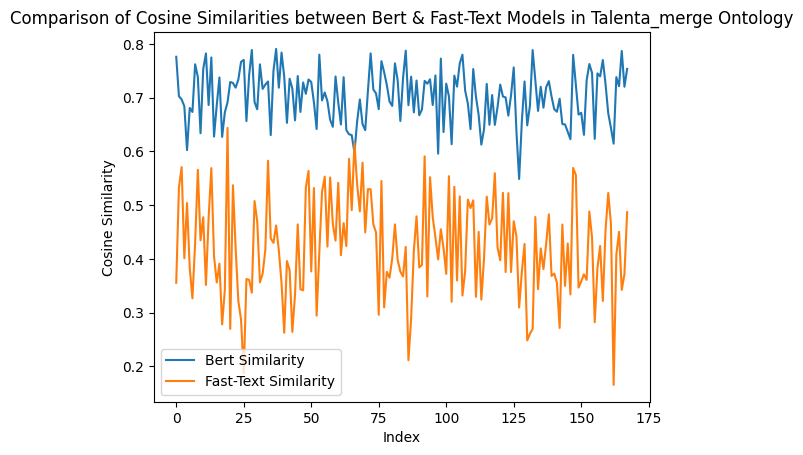

In [ ]:
plt.plot(x_merger, y1_merger, label='Bert Similarity')
plt.plot(x_merger, y2_merger, label='Fast-Text Similarity')
plt.xlabel('Index')
plt.ylabel('Cosine Similarity')
plt.title('Comparison of Cosine Similarities between Bert & Fast-Text Models in Talenta_merge Ontology')
plt.legend()
plt.show()

## Choosing the best ontology with Cosine Similarity

In [ ]:
# Add the ontology column
df_cosine_similarity_merger['Ontology'] = 'Talenta_merge'

In [ ]:
# Removing the Embedding columns from all dataframes
df_cosine_similarity_merger = df_cosine_similarity_merger.drop(['Input_Sentence_Embedding', 'Annotation_Embedding'], axis=1)

In [ ]:
df_onto_merge = pd.concat([df_cosine_similarity_merger], ignore_index=True)

In [ ]:
# group the dataframe by the sentences in the original paragraph and find the maximum cosine similarity score for each group
max_similarities_onto = df_onto_merge.groupby('Input_Sentence')['Cosine_Similarity'].max().reset_index()

In [ ]:
# merge the original dataframe with the maximum cosine similarity scores
df_onto = pd.merge(df_onto_merge, max_similarities_onto, on=['Input_Sentence', 'Cosine_Similarity'], how='inner')

In [ ]:
# Remove duplicates based on column 'Cosine_Similarity'
df_onto.drop_duplicates(subset=['Cosine_Similarity'], keep='first', inplace=True)

In [ ]:
# Reset the index of the resulting dataframe
df_onto.reset_index(drop=True, inplace=True)

In [ ]:
df_onto.head(30)

,Input_Sentence,Annotation,Class,Cosine_Similarity,Ontology
0,Approved Sector Plan and Sectional Map Amendme...,Descripción de fecha y tiempo estructurada con...,DateTimeDescription,0.775843,Talenta_merge
1,• To provide safe and convenient vehicular and...,An urban administrative division with jurisdic...,Municipality,0.702366,Talenta_merge
2,• To develop a system of trails sidewalks and ...,An urban administrative division with jurisdic...,Municipality,0.696516,Talenta_merge
3,The average annual daily traffic AADT volumes...,The Travel Time Index TTI calculated against t...,TTI_Max,0.683808,Talenta_merge
4,The Washington Metropolitan Area Transit Autho...,An urban administrative division with jurisdic...,Municipality,0.602287,Talenta_merge
5,The WMATA Metro bus routes that serve the area...,Future extensions should capture this semantic...,AccessRestriction,0.680714,Talenta_merge
6,Although Maryland Railroad Commuter System MAR...,Future extensions should capture this semantic...,AccessRestriction,0.673231,Talenta_merge
7,Overall road condition and road width in the i...,Capacity of traffic throughput for a lane eg v...,LaneCapacity_unit,0.761891,Talenta_merge
8,The predominance of large visible outdoor stor...,An urban administrative division with jurisdic...,Municipality,0.738449,Talenta_merge
9,Pedestrian access to the Metro station from th...,Future extensions should capture this semantic...,AccessRestriction,0.633655,Talenta_merge


## Annotations

In [ ]:
# Combine all the sannotations and their respective ontology names into a single list
ann_list = valid_sentences_merger
ann_onto_names = ['Talenta_merge'] * len(valid_sentences_merger)

In [ ]:
# Create a dataframe with the annotations and their ontology names
df_mlp = pd.DataFrame({'Annotation': ann_list, 'Ontology': ann_onto_names})

In [ ]:
# Load pre-trained model and tokenizer
model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# define the get_embedding function
def get_embedding(text, model, tokenizer):
    input_ids = tokenizer.encode(text, add_special_tokens=True)
    input_ids = torch.tensor(input_ids).unsqueeze(0)
    with torch.no_grad():
        outputs = model(input_ids)
        last_hidden_states = outputs[0].squeeze(0)
        mean_last_hidden_states = torch.mean(last_hidden_states, dim=0)
    return mean_last_hidden_states.numpy()

In [ ]:
# Apply the Bert model to obtain annotation embeddings
df_mlp["Annotation_Embedding"] = df_mlp["Annotation"].apply(lambda x: get_embedding(x, model, tokenizer))

In [ ]:
df_mlp.head(10)

,Annotation,Ontology,Annotation_Embedding
0,An agency operates a certain schedule based tr...,Talenta_merge,"[-0.035045516, -0.07233052, 0.16500607, 0.3149..."
1,A gtfsRoute is a commercial route followed ent...,Talenta_merge,"[-0.054234196, -0.00381792, 0.1817012, 0.32130..."
2,A collection of gtfsStopTimes followed by a tr...,Talenta_merge,"[-0.08012555, -0.06147611, 0.23603426, 0.37853..."
3,A temporal interval or instant Un intervalo t...,Talenta_merge,"[-0.35903305, -0.15920939, 0.18648812, 0.04017..."
4,In order to achieve a coherent interdependent ...,Talenta_merge,"[0.00014429944, 0.46364126, 0.3825792, -0.0313..."
5,Length is the amount of space between two geog...,Talenta_merge,"[-0.07684398, 0.017499827, 0.30890438, -0.0489..."
6,A location where passengers board or disembark...,Talenta_merge,"[-0.065176375, -0.17420074, 0.06748516, 0.2930..."
7,Instances of this class can be used by gtfsdro...,Talenta_merge,"[-0.39102066, 0.04357686, 0.059944436, 0.22893..."
8,A physical structure or area that contains one...,Talenta_merge,"[-0.000887601, 0.08129435, 0.30573845, 0.12018..."
9,A class describing how the fare is calculated ...,Talenta_merge,"[-0.124511525, -0.16616483, 0.3174032, 0.20134..."


In [ ]:
X = df_mlp["Annotation_Embedding"].tolist()
y = df_mlp["Ontology"].tolist()

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
input_dim = 768  # Size of BERT embeddings
hidden_dim = 768  # Size of hidden layer
output_dim = len(label_encoder.classes_)  # Number of unique labels

In [ ]:
model_mlp = MLP(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mlp.parameters(), lr=0.001)

In [ ]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
num_epochs = 10
batch_size = 32

In [ ]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        optimizer.zero_grad()

        outputs = model_mlp(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate validation loss
    with torch.no_grad():
        val_outputs = model_mlp(X_val.float())
        val_loss = criterion(val_outputs, y_val)

    print(f'Epoch {epoch+1} - Training Loss: {running_loss/len(X_train)} - Validation Loss: {val_loss.item()}')

Epoch 1 - Training Loss: 0.0 - Validation Loss: 0.0
Epoch 2 - Training Loss: 0.0 - Validation Loss: 0.0
Epoch 3 - Training Loss: 0.0 - Validation Loss: 0.0
Epoch 4 - Training Loss: 0.0 - Validation Loss: 0.0
Epoch 5 - Training Loss: 0.0 - Validation Loss: 0.0
Epoch 6 - Training Loss: 0.0 - Validation Loss: 0.0
Epoch 7 - Training Loss: 0.0 - Validation Loss: 0.0
Epoch 8 - Training Loss: 0.0 - Validation Loss: 0.0
Epoch 9 - Training Loss: 0.0 - Validation Loss: 0.0
Epoch 10 - Training Loss: 0.0 - Validation Loss: 0.0


In [ ]:
with torch.no_grad():
    test_outputs = model_mlp(X_test.float())
    predicted = torch.argmax(test_outputs, dim=1)
    accuracy = (predicted == y_test).sum().item() / len(y_test)
    print(f'Test Accuracy: {accuracy}')

Test Accuracy: 1.0


In [ ]:
# Convert the predicted numpy array to a PyTorch tensor
predicted = predicted.numpy()

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, predicted)

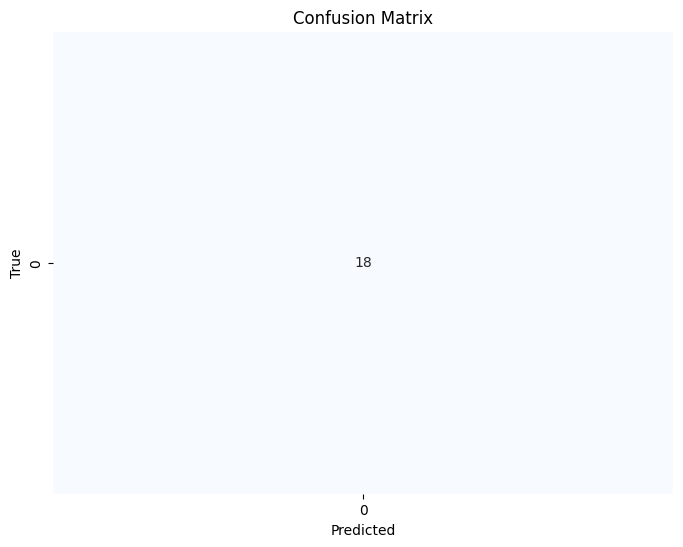

In [ ]:
# Create a heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# Convert the predicted tensor to a numpy array
predicted = torch.from_numpy(predicted)

In [ ]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, predicted, average='macro')
recall = recall_score(y_test, predicted, average='macro')
f1 = f1_score(y_test, predicted, average='macro')

In [ ]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## Projection of Annotation Embeddings

In [ ]:
# Extract embeddings and ontology names
embeddings_ann = np.array(df_mlp["Annotation_Embedding"].tolist())
ontology_names = df_mlp["Ontology"].tolist()

In [ ]:
# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embeddings_proj = tsne.fit_transform(embeddings_ann)

In [ ]:
# Create a new DataFrame with the embeddings and ontology names
df_projection = pd.DataFrame(embeddings_proj, columns=['X', 'Y'])
df_projection["Ontology"] = ontology_names

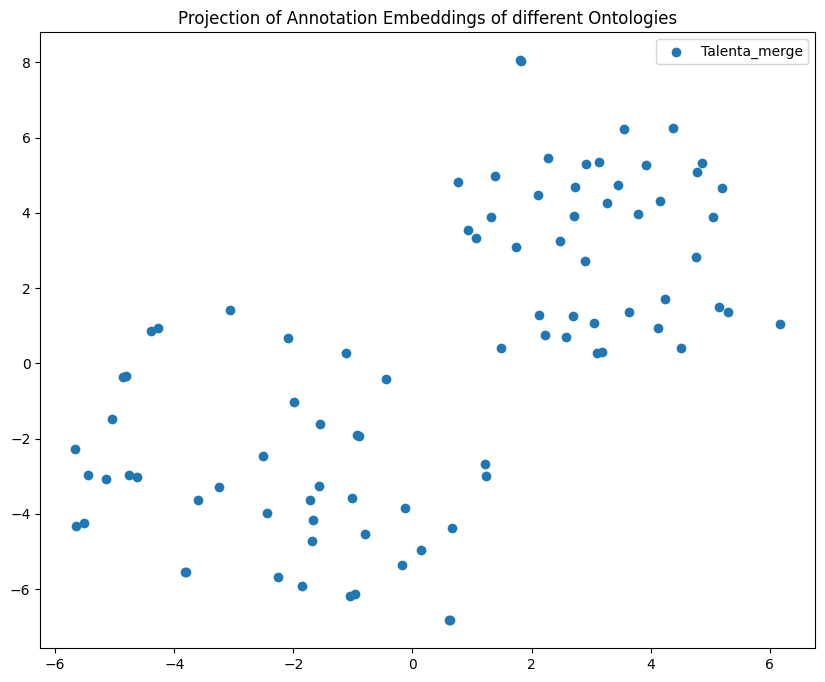

In [ ]:
# Plot the projection
plt.figure(figsize=(10, 8))
for ontology_name in df_projection["Ontology"].unique():
    subset = df_projection[df_projection["Ontology"] == ontology_name]
    plt.scatter(subset['X'], subset['Y'], label=ontology_name)

plt.title('Projection of Annotation Embeddings of different Ontologies')
plt.legend()
plt.show()

## Choosing the best ontology with MLP

## Input Text

In [ ]:
#Create a dataframe with the input sentences
df_input_mlp = pd.DataFrame({'Input_Sentence': valid_sentences})

In [ ]:
# Apply the Bert model to obtain input sentences embeddings
df_input_mlp["Input_Sentence_Embedding"] = df_input_mlp["Input_Sentence"].apply(lambda x: get_embedding(x, model, tokenizer))

In [ ]:
df_input_mlp.head(17)

,Input_Sentence,Input_Sentence_Embedding
0,Approved Sector Plan and Sectional Map Amendme...,"[-0.55281645, -0.1764139, 0.43178833, 0.105939..."
1,• To provide safe and convenient vehicular and...,"[-0.0318279, -0.11287132, 0.32198036, 0.054738..."
2,• To develop a system of trails sidewalks and ...,"[-0.2713781, 0.007005232, 0.21209206, 0.235203..."
3,The average annual daily traffic AADT volumes...,"[-0.35839623, 0.110800855, 0.30453494, -0.0585..."
4,The Washington Metropolitan Area Transit Autho...,"[-0.0844689, -0.1214527, -0.06310612, 0.195376..."
5,The WMATA Metro bus routes that serve the area...,"[-0.03361992, -0.15805896, 0.34685785, 0.16275..."
6,Although Maryland Railroad Commuter System MAR...,"[-0.28095657, -0.34353176, 0.011578255, 0.1449..."
7,Overall road condition and road width in the i...,"[-0.009399944, 0.05538921, 0.27780548, 0.02605..."
8,The predominance of large visible outdoor stor...,"[-0.042771887, 0.18431464, 0.22870432, -0.1164..."
9,Pedestrian access to the Metro station from th...,"[-0.11237871, -0.13679272, -0.088066325, -0.01..."


In [ ]:
# Convert BERT embeddings to tensors
X_new = torch.tensor(df_input_mlp['Input_Sentence_Embedding'].tolist())

In [ ]:
with torch.no_grad():
    outputs = model_mlp(X_new.float())
    predicted_labels = label_encoder.inverse_transform(torch.argmax(outputs, dim=1))

In [ ]:
df_input_mlp['Predicted Ontology'] = predicted_labels

In [ ]:
df_input_mlp = df_input_mlp.drop(['Input_Sentence_Embedding'], axis=1)

In [ ]:
df_input_mlp.head(30)

,Input_Sentence,Predicted Ontology
0,Approved Sector Plan and Sectional Map Amendme...,Talenta_merge
1,• To provide safe and convenient vehicular and...,Talenta_merge
2,• To develop a system of trails sidewalks and ...,Talenta_merge
3,The average annual daily traffic AADT volumes...,Talenta_merge
4,The Washington Metropolitan Area Transit Autho...,Talenta_merge
5,The WMATA Metro bus routes that serve the area...,Talenta_merge
6,Although Maryland Railroad Commuter System MAR...,Talenta_merge
7,Overall road condition and road width in the i...,Talenta_merge
8,The predominance of large visible outdoor stor...,Talenta_merge
9,Pedestrian access to the Metro station from th...,Talenta_merge


# Chosen Ontology by both the Methods

In [ ]:
# Merge both the dataframes
df_chosen_onto = pd.merge(df_onto, df_input_mlp, on='Input_Sentence', how='left')

In [ ]:
# Removing unecessary columns
df_chosen_onto = df_chosen_onto.drop(['Annotation', 'Class', 'Cosine_Similarity'], axis=1)

In [ ]:
# Renaming the columns
df_chosen_onto.rename(columns={'Ontology': 'Ontology_Cosine_Similarity', 'Predicted Ontology': 'Ontology_MLP'}, inplace=True)

In [ ]:
df_chosen_onto.head(30)

,Input_Sentence,Ontology_Cosine_Similarity,Ontology_MLP
0,Approved Sector Plan and Sectional Map Amendme...,Talenta_merge,Talenta_merge
1,• To provide safe and convenient vehicular and...,Talenta_merge,Talenta_merge
2,• To develop a system of trails sidewalks and ...,Talenta_merge,Talenta_merge
3,The average annual daily traffic AADT volumes...,Talenta_merge,Talenta_merge
4,The Washington Metropolitan Area Transit Autho...,Talenta_merge,Talenta_merge
5,The WMATA Metro bus routes that serve the area...,Talenta_merge,Talenta_merge
6,Although Maryland Railroad Commuter System MAR...,Talenta_merge,Talenta_merge
7,Overall road condition and road width in the i...,Talenta_merge,Talenta_merge
8,The predominance of large visible outdoor stor...,Talenta_merge,Talenta_merge
9,Pedestrian access to the Metro station from th...,Talenta_merge,Talenta_merge
